In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/'

/content/drive/MyDrive


Loading Libraries

In [3]:
#Import libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import mean_absolute_error, mean_squared_error



Loading the dataset


In [6]:
#Import dataset

df=pd.read_csv('MicrosoftFinalData2.csv')
df.head(5)




,Date,Open,High,Low,Close,Adj Close,compound,neg,neu,pos
0,2006-12-01,29.23,29.30,28.90,29.12,29.12,0.0000,0.000,0.000,0.000
1,2006-12-04,29.23,29.52,29.17,29.33,29.33,-0.7783,0.137,0.863,0.000
2,2006-12-05,29.36,29.40,29.03,29.13,29.13,0.0000,0.000,0.000,0.000
3,2006-12-06,29.10,29.13,28.87,28.99,28.99,0.9003,0.051,0.847,0.102
4,2006-12-07,28.96,29.07,28.81,28.85,28.85,0.6597,0.000,0.810,0.190


Cleaning The Dataset


In [7]:
# Identifying and imputing missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   compound   2517 non-null   float64
 7   neg        2517 non-null   float64
 8   neu        2517 non-null   float64
 9   pos        2517 non-null   float64
dtypes: float64(9), object(1)
memory usage: 196.8+ KB


In [8]:
#Feature Engineering

df = df.drop('Close', axis=1)
df.tail()

,Date,Open,High,Low,Adj Close,compound,neg,neu,pos
2512,2016-11-23,61.01,61.10,60.25,60.40,0.8478,0.0,0.842,0.158
2513,2016-11-25,60.30,60.53,60.13,60.53,0.0000,0.0,0.000,0.000
2514,2016-11-28,60.34,61.02,60.21,60.61,0.0000,0.0,0.000,0.000
2515,2016-11-29,60.65,61.41,60.52,61.09,0.0000,0.0,0.000,0.000
2516,2016-11-30,60.86,61.18,60.22,60.26,0.0000,0.0,0.000,0.000


In [9]:
#Converting "Date" to date time format
df['Date']= pd.to_datetime(df.Date)
df.info()

#Changing the datetime to the index
df.set_index("Date" , inplace=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2517 non-null   datetime64[ns]
 1   Open       2517 non-null   float64       
 2   High       2517 non-null   float64       
 3   Low        2517 non-null   float64       
 4   Adj Close  2517 non-null   float64       
 5   compound   2517 non-null   float64       
 6   neg        2517 non-null   float64       
 7   neu        2517 non-null   float64       
 8   pos        2517 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 177.1 KB


,Open,High,Low,Adj Close,compound,neg,neu,pos
Date,,,,,,,,
2006-12-01,29.23,29.30,28.90,29.12,0.0000,0.000,0.000,0.000
2006-12-04,29.23,29.52,29.17,29.33,-0.7783,0.137,0.863,0.000
2006-12-05,29.36,29.40,29.03,29.13,0.0000,0.000,0.000,0.000
2006-12-06,29.10,29.13,28.87,28.99,0.9003,0.051,0.847,0.102
2006-12-07,28.96,29.07,28.81,28.85,0.6597,0.000,0.810,0.190


In [10]:
# Describe the dataset
df.describe()

,Open,High,Low,Adj Close,compound,neg,neu,pos
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,33.710799,34.041152,33.387135,33.724839,0.140589,0.026843,0.457290,0.048635
std,10.223515,10.276010,10.178588,10.237321,0.410403,0.048305,0.432774,0.068118
min,15.200000,15.620000,14.870000,15.150000,-0.978300,0.000000,0.000000,0.000000
25%,26.760000,27.000000,26.480000,26.770000,0.000000,0.000000,0.000000,0.000000
50%,29.910000,30.130000,29.660000,29.910000,0.000000,0.000000,0.729000,0.000000
75%,40.700000,41.190000,40.310000,40.790000,0.421500,0.044000,0.867000,0.091000
max,61.010000,61.410000,60.810000,61.120000,0.988600,0.443000,1.000000,0.416000


Visualization


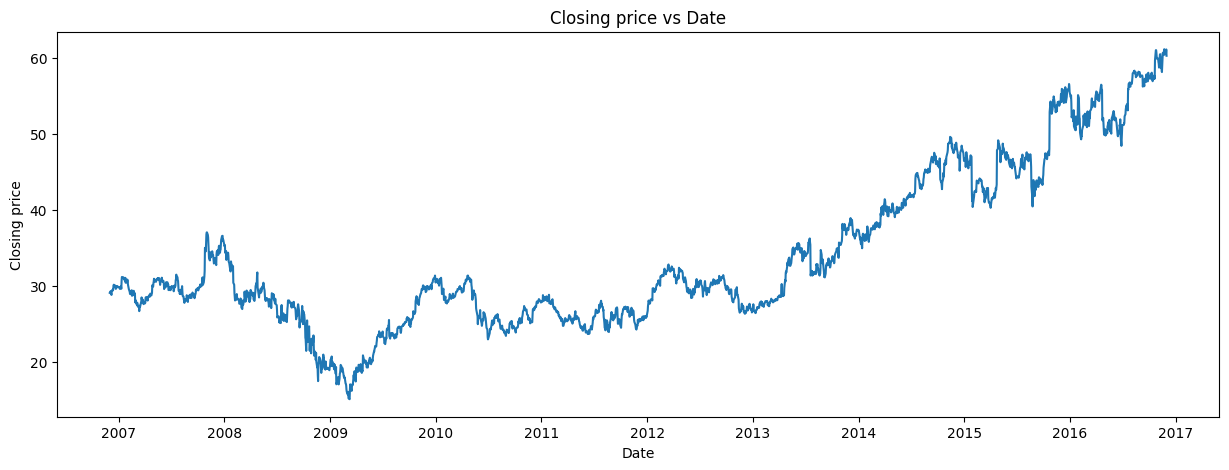

In [11]:
# Visualizing the data
# Simple plot
plt.figure(figsize=(15,5))
plt.plot(df['Adj Close'])
plt.xlabel("Date")
plt.ylabel("Closing price")
plt.title('Closing price vs Date')


plt.show()

Data Preprocessing

In [12]:
#Creating a new dataframe with only the close column
target= df.filter(['Adj Close']).values
features= df.drop('Adj Close', axis=1).values



In [13]:
#Scale the data
scaler = MinMaxScaler(feature_range= (0,1))
features = scaler.fit_transform(features)



In [14]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,
                                                    test_size= 0.2,
                                                    random_state=0)

In [15]:

#Converting the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [16]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2013, 7, 1)

In [17]:
# Build the model
model = Sequential()
model.add(Dense(64, input_dim= x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer (1 neuron for regression)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')



In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit


# Define the number of splits (folds) for cross-validation
n_splits = 10
#Initialize TimeSeriesSplit for rolling cross-validation
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store performance metrics
mse_scores = []
predictions=[]

# Iterate over the folds
for train_index, test_index in tscv.split(features):
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = target[train_index], target[test_index]

    # Train your ANN model on X_train and y_train
    # Make predictions on X_test
    # Calculate mean squared error for this fold
    # Append the MSE to mse_scores
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    mse_scores.append(mse)

# Calculate and print the average MSE across all folds
average_mse = np.mean(mse_scores)
print(f'Average Mean Squared Error: {average_mse}')


8/8 [==============================] - 0s 2ms/step
Average Mean Squared Error: 0.10161859573904056


In [23]:
#Get the root mean squared error(RSME) and mean absolute error(MAE)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

rmse = np.sqrt( np.mean(predictions - y_test)** 2)
print("Root Mean Square Error", rmse)

Mean Absolute Error (MAE): 0.31099640561823283
Root Mean Square Error 0.04465053491425103


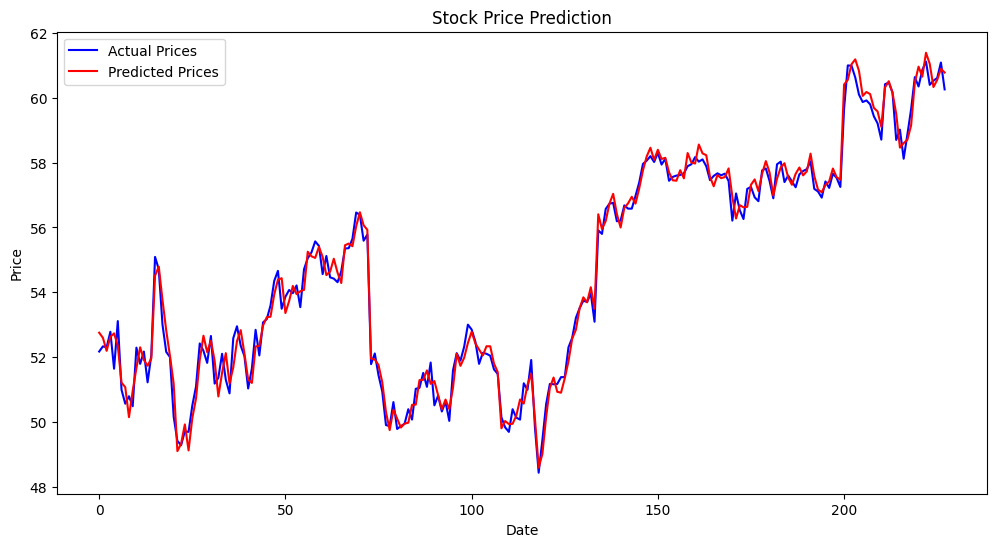

In [24]:
# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [25]:
validation= pd.DataFrame(y_test)
validation["Prediction"]= predictions
validation


,0,Prediction
0,52.17,52.752068
1,52.33,52.594246
2,52.30,52.192009
3,52.78,52.623951
4,51.64,52.731041
...,...,...
223,60.40,61.047909
224,60.53,60.333309
225,60.61,60.552216
226,61.09,60.895523
